# Computation on NP Arrays: Universal Functions

* Computation on NumPy arrays can be very fast, or it can be very slow. The key to making it fast is to use vectorized operations, generally implemented through NumPy’s universal functions (ufuncs).

In [1]:
import numpy as np

nprange = np.random.default_rng(seed=42)

def recip(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[1] = 1.0 / values[i]

    return output

In [2]:
vals = nprange.integers(1, 10, size=5)
print(vals)

[1 7 6 4 4]


In [4]:
%timeit recip(vals)

8.69 µs ± 213 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [5]:
big_vals = nprange.integers(1, 100, size=1000000)
%timeit recip(big_vals)

1.63 s ± 99.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%timeit (1.0 / big_vals)

6.24 ms ± 664 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### A. Ufuncs

* Vectorized operations in NumPy are implemented via ufuncs, whose main purpose is to quickly execute repeated operations on values in NumPy arrays.
* Computations using vectorization through ufuncs are nearly always more efficient than their counterparts implemented using Python loops, especially as the arrays grow in size.
* Unary Ufuncs :
    * Operate on a single input.
* Binary Ufuncs :
    * Operate on two inputs.

##### A.1 : Array Arithmetic:



In [7]:
x = np.arange(4)
x

array([0, 1, 2, 3])

In [10]:
print("x+5 = ", x+5)
print("x-5 = ", x-5)
print("x*5 = ", x*5)
print("x/5 = ", x/5)
print("x//5 = ", x//5)
print("\n")
print("-x  = ", -x)
print("x**5 = ", x**5)
print("x%5 = ", x%5)

x+5 =  [5 6 7 8]
x-5 =  [-5 -4 -3 -2]
x*5 =  [ 0  5 10 15]
x/5 =  [0.  0.2 0.4 0.6]
x//5 =  [0 0 0 0]


-x  =  [ 0 -1 -2 -3]
x**5 =  [  0   1  32 243]
x%5 =  [0 1 2 3]


* All of these arithmetic operations are simply convenient wrappers around specific ufuncs built into Numpy.

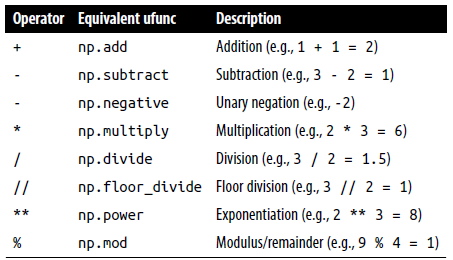

### A.2 Absolute Value

In [11]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

In [12]:
# Equivalent np ufunc
np.absolute(x)

array([2, 1, 0, 1, 2])

In [13]:
# Alias 
np.abs(x)

array([2, 1, 0, 1, 2])

In [14]:
y = np.array([3-4j, 4-3j, 2+0j, 0+1])
np.abs(y)

array([5., 5., 2., 1.])

### A.3 Trigonometric Functions:

In [15]:
theta = np.linspace(0, np.pi, 3)
theta

array([0.        , 1.57079633, 3.14159265])

In [16]:
print('sin(theta) = ', np.sin(theta))
print('cos(theta) = ', np.cos(theta))
print('tan(theta) = ', np.tan(theta))
print('tanh(theta) = ', np.tanh(theta))


sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]
tanh(theta) =  [0.         0.91715234 0.99627208]


In [18]:
y = [-1, 0, 1]
print('arcsin(theta) = ', np.arcsin(y))
print('arccos(theta) = ', np.arccos(y))
print('arctan(theta) = ', np.arctan(y))

arcsin(theta) =  [-1.57079633  0.          1.57079633]
arccos(theta) =  [3.14159265 1.57079633 0.        ]
arctan(theta) =  [-0.78539816  0.          0.78539816]


### A.4 Exponents and Logarithms:

In [19]:
x = [1, 2, 3]
print("x =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3., x))

x = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3.  9. 27.]


In [20]:
x = [1, 2, 4, 10]
print("x =", x)
print("ln(x) =", np.log(x))
print("log2(x) =", np.log2(x))   # base-2 logarithm
print("log10(x) =", np.log10(x)) # base-10 logarithm

x = [1, 2, 4, 10]
ln(x) = [0.         0.69314718 1.38629436 2.30258509]
log2(x) = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


In [21]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


### A.5 Specialized Ufuncs

* Another excellent source for more specialized ufuncs is the submodule `scipy.special`.

In [22]:
from scipy import special

In [23]:
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x) =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2) =", special.beta(x, 2))

gamma(x) = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2) = [0.5        0.03333333 0.00909091]


In [24]:
# Error function (integral of Gaussian),
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x) =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x) = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


# B. Advanced Ufunc Features

### B.1 : Specifying Output

* For large calculations, it is sometimes useful to be able to specify the array where the
result of the calculation will be stored. For all ufuncs, this can be done using the `out`
argument of the function.

In [25]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [27]:
y = np.zeros(10)
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
np.power(2, x, out=y[::2])
y

array([ 1.,  0.,  2.,  0.,  4.,  0.,  8.,  0., 16.,  0.])

### B.2: Aggregations

* For binary ufuncs, aggregations can be computed directly from the object. 
* For example, if we’d like to reduce an array with a particular operation, we can use the reduce method of any ufunc. 
    * A reduce repeatedly applies a given operation to the elements of an array until only a single result remains.

In [29]:
x = np.arange(1, 6)
np.add.reduce(x)

15

In [30]:
np.multiply.reduce(x)

120

In [31]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [32]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

In [37]:
x = np.arange(1, 6)
y = np.arange(7, 11)

In [38]:
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

In [39]:
np.multiply.outer(x, y)

array([[ 7,  8,  9, 10],
       [14, 16, 18, 20],
       [21, 24, 27, 30],
       [28, 32, 36, 40],
       [35, 40, 45, 50]])